In [1]:
import pandas as pd

# Load the dataset
file_path = "../dataset/raw_analyst_ratings.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [2]:
# Basic structure of the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


In [35]:
# Check for missing values
print(df.isnull().sum())
# Check for duplicate rows
print(f"Number of duplicates: {df.duplicated().sum()}")


Unnamed: 0         0
headline           0
url                0
publisher          0
date               0
stock              0
headline_length    0
dtype: int64
Number of duplicates: 0


count    1.407328e+06
mean     6.985079e+01
std      3.888300e+01
min      2.000000e+00
25%      4.500000e+01
50%      6.100000e+01
75%      8.200000e+01
max      4.980000e+02
Name: headline_length, dtype: float64


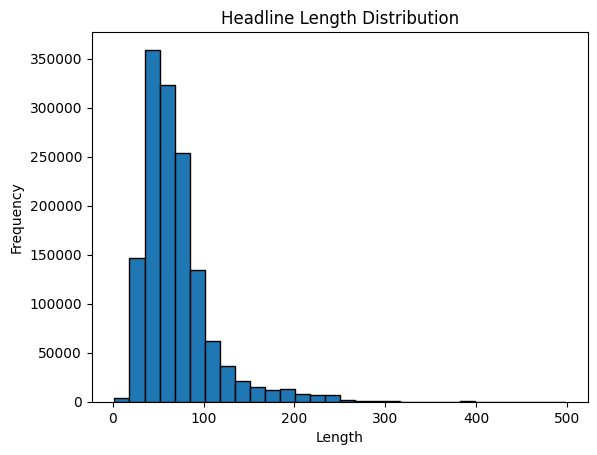

In [51]:
# Calculate the length of each headline
df['headline_length'] = df['headline'].apply(len)

# Display basic statistics about headline lengths
print(df['headline_length'].describe())

# Visualize headline length distribution
import matplotlib.pyplot as plt
plt.hist(df['headline_length'], bins=30, edgecolor='k')
plt.title("Headline Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

In [52]:
print(df['headline'].head())  # Display first few headlines
print(df['headline'].isnull().sum())  # Check for missing values

0               Stocks That Hit 52Week Highs On Friday
1            Stocks That Hit 52Week Highs On Wednesday
2                        71 Biggest Movers From Friday
3           46 Stocks Moving In Fridays MidDay Session
4    B of A Securities Maintains Neutral on Agilent...
Name: headline, dtype: object
0


In [53]:
# Replace missing headlines with empty strings
df['headline'] = df['headline'].fillna('')

In [54]:
# Use simple split for tokenization
all_tokens = ' '.join(df['headline']).split()
word_counts = Counter(all_tokens)
print(word_counts.most_common(10))

[('to', 278252), ('of', 200276), ('Stocks', 157728), ('For', 154488), ('vs', 152260), ('on', 143840), ('Est', 132163), ('In', 130278), ('EPS', 128705), ('To', 124337)]


In [55]:
import re

# Clean text: remove punctuation and convert to lowercase
clean_text = re.sub(r'[^\w\s]', '', all_words.lower())

# Tokenize and count
word_list = clean_text.split()
word_counts = Counter(word_list)

print("Top 10 most common words (after cleaning):")
print(word_counts.most_common(10))

Top 10 most common words (after cleaning):
[('to', 402875), ('of', 269807), ('on', 245071), ('for', 238895), ('in', 220556), ('the', 212758), ('vs', 162061), ('stocks', 161868), ('est', 140578), ('eps', 128910)]


In [56]:
# Combine all headlines into one string
all_words = ' '.join(df['headline'])

# Tokenize words using split
word_list = all_words.split()

# Count word frequencies
from collections import Counter
word_counts = Counter(word_list)

# Display the most common words
print("Top 10 most common words:")
print(word_counts.most_common(10))

Top 10 most common words:
[('to', 278252), ('of', 200276), ('Stocks', 157728), ('For', 154488), ('vs', 152260), ('on', 143840), ('Est', 132163), ('In', 130278), ('EPS', 128705), ('To', 124337)]


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


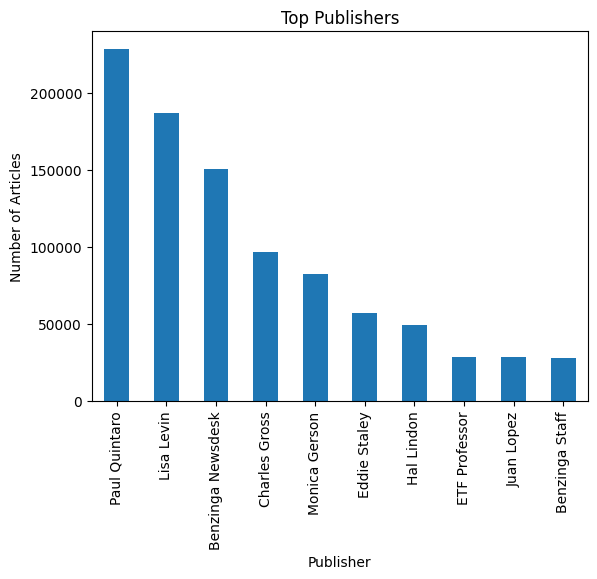

In [57]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()

# Display the top publishers
print(publisher_counts.head())

# Visualize the top publishers
publisher_counts.head(10).plot(kind='bar', title='Top Publishers')
plt.ylabel("Number of Articles")
plt.xlabel("Publisher")
plt.show()

domain
www.benzinga.com    1407328
Name: count, dtype: int64


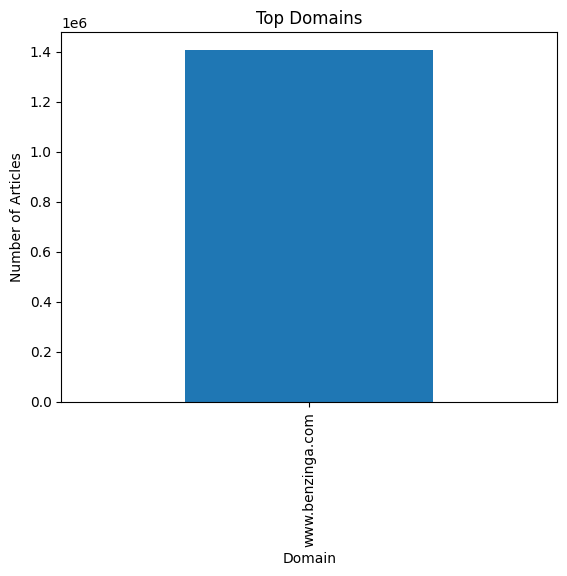

In [58]:
# Extract domains from URLs
df['domain'] = df['url'].str.extract(r'//([^/]+)/')[0]

# Count articles by domain
domain_counts = df['domain'].value_counts()
print(domain_counts.head())

# Visualize the top domains
domain_counts.head(10).plot(kind='bar', title='Top Domains')
plt.ylabel("Number of Articles")
plt.xlabel("Domain")
plt.show()